### Image Compression with IPCA

##### 2020710058 Applied Data Science Doo-yeong, Lee

In [5]:
# Load libraries 
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Read a Image file
image_raw = imread("skku.jpg")

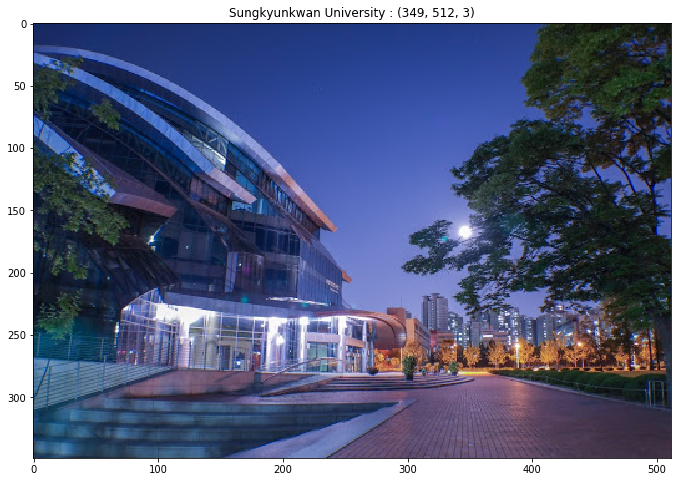

In [9]:
# Displaying the image
plt.figure(figsize = (12,8))
plt.title('Sungkyunkwan University : {}'.format(image_raw.shape))
plt.imshow(image_raw)

In [24]:
# Normalize
r = image_raw[:, :, 0]/255.0
g = image_raw[:, :, 1]/255.0
b = image_raw[:, :, 2]/255.0
print("Shape of Image_raw:", image_raw.shape)
print("Shape of r, g, b :", r.shape, g.shape, b.shape )

# Reshape from 3d to 2d for PCA
r = r.reshape(image_raw.shape[0], image_raw.shape[1])
g = g.reshape(image_raw.shape[0], image_raw.shape[1])
b = b.reshape(image_raw.shape[0], image_raw.shape[1])

Shape of Image_raw: (349, 512, 3)
Shape of r, g, b : (349, 512) (349, 512) (349, 512)


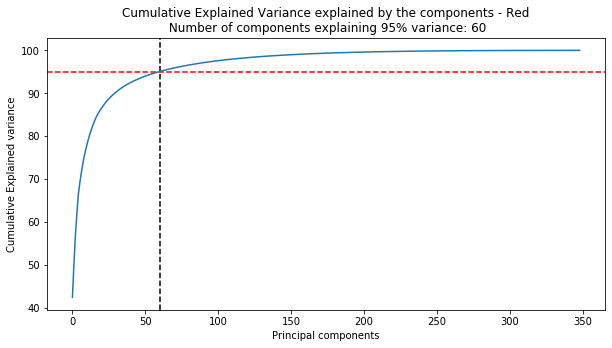

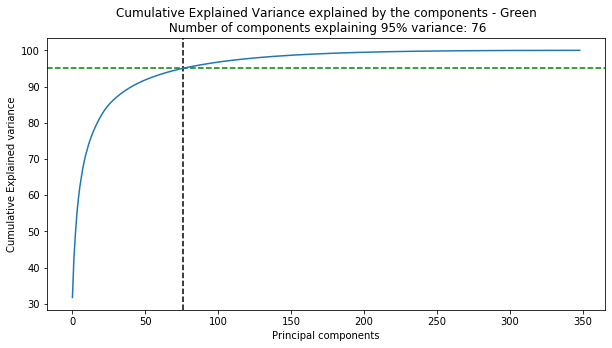

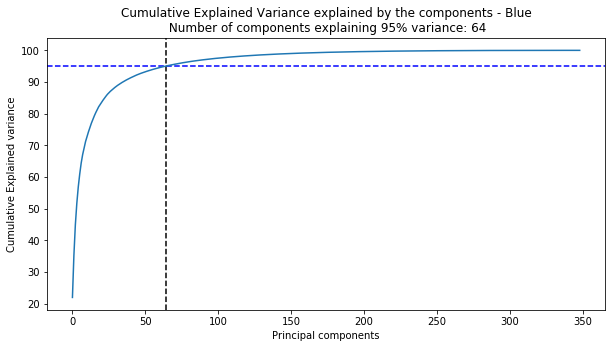

In [42]:
from sklearn.decomposition import IncrementalPCA

prev_k = 0

for color, c_arr in zip(['Red', 'Green', 'Blue'], [r, g, b]):
    pca = IncrementalPCA()
    pca.fit(c_arr)
    
    # Getting the cumulative variance
    var_cumu = np.cumsum(pca.explained_variance_ratio_)*100
    
    # k - PCs explain 95% of the variance
    k = np.argmax(var_cumu>95)
    if k > prev_k:
        max_k = k
    prev_k = k
    
    plt.figure(figsize = (10, 5))
    plt.title('Cumulative Explained Variance explained by the components - {}\n Number of components explaining 95% variance: {}'.format(color, k))
    plt.ylabel('Cumulative Explained variance')
    plt.xlabel('Principal components')
    plt.axvline(x = k, color = 'k', linestyle = '--')
    plt.axhline(y = 95, color = color, linestyle = '--')
    ax = plt.plot(var_cumu)

### Plot image with 76 PCs

Comparison: (349, 512) (349, 76)
Comparison: (349, 512) (349, 76)
Comparison: (349, 512) (349, 76)


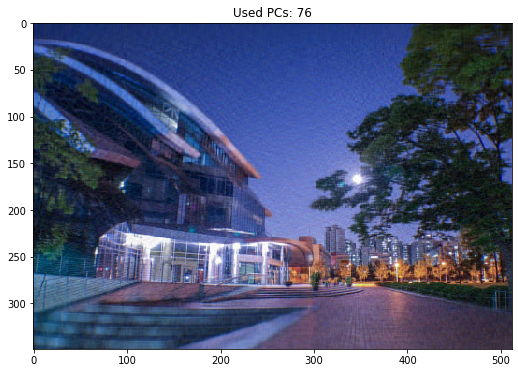

In [52]:
def image_k(k):
    recon_arr = []
    for color, c_arr in zip(['Red', 'Green', 'Blue'], [r, g, b]):
        ipca = IncrementalPCA(n_components = k)
        image_recon = ipca.inverse_transform(ipca.fit_transform(c_arr)) # (349, k, 3) -> (349, 512, 3)
        image_recon_ref = ipca.fit_transform(c_arr)
        recon_arr.append(image_recon)
        print("Comparison:", image_recon.shape,image_recon_ref.shape)
    
    image_recon = np.zeros((image_raw.shape[0], image_raw.shape[1], 3)) # (349, 512, 3)
    
    image_recon[:, :, 0] = recon_arr[0]
    image_recon[:, :, 1] = recon_arr[1]
    image_recon[:, :, 2] = recon_arr[2]
    return image_recon

# Plotting the reconstructed image
plt.figure(figsize = (15,6))
plt.title('Used PCs: {}'.format(max_k))
plt.imshow(np.clip(image_k(max_k), 0, 1))

### Reconstructing and plotting for different number of components

Comparison: (349, 512) (349, 10)
Comparison: (349, 512) (349, 10)
Comparison: (349, 512) (349, 10)
Exp_Var_Ratio of R, G, B: [0.7673780496544474, 0.7094150719739312, 0.7121420516589548]
Comparison: (349, 512) (349, 25)
Comparison: (349, 512) (349, 25)
Comparison: (349, 512) (349, 25)
Exp_Var_Ratio of R, G, B: [0.8839052360735127, 0.845209993396044, 0.8611614213002166]
Comparison: (349, 512) (349, 50)
Comparison: (349, 512) (349, 50)
Comparison: (349, 512) (349, 50)
Exp_Var_Ratio of R, G, B: [0.938811311943961, 0.9167268707621162, 0.9307958967088559]
Comparison: (349, 512) (349, 76)
Comparison: (349, 512) (349, 76)
Comparison: (349, 512) (349, 76)
Exp_Var_Ratio of R, G, B: [0.9627917898925796, 0.9495631266046815, 0.9602877500019829]
Comparison: (349, 512) (349, 150)
Comparison: (349, 512) (349, 150)
Comparison: (349, 512) (349, 150)
Exp_Var_Ratio of R, G, B: [0.9897469434083396, 0.9862289861627211, 0.9899376829285733]


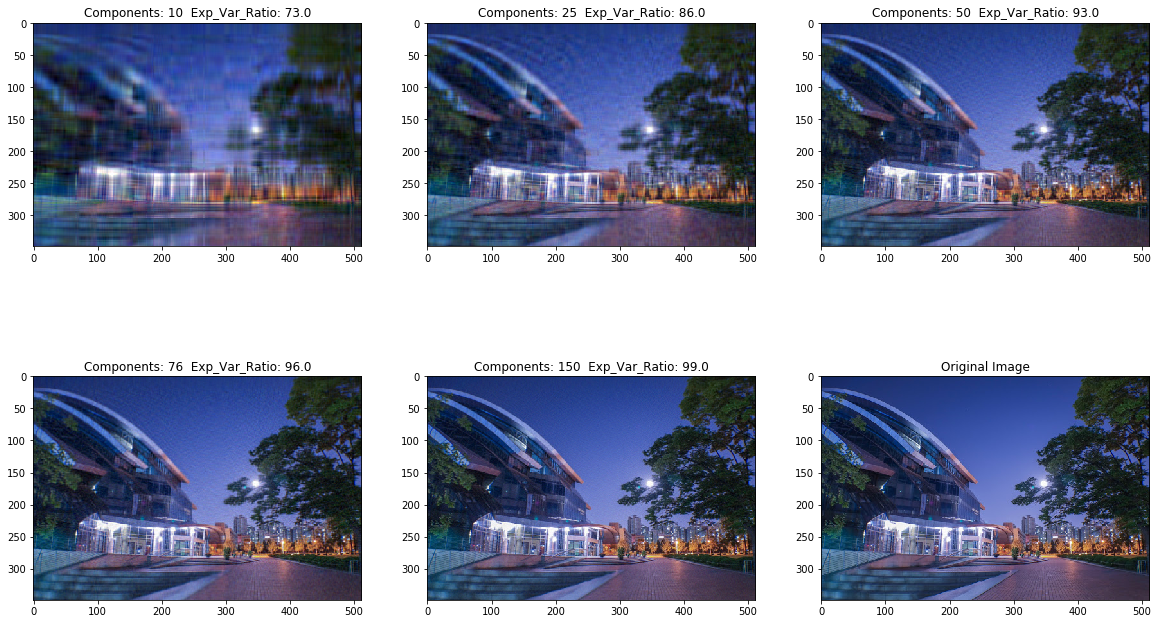

In [61]:
exp = 0
def plot_at_k(k):
    global exp
    recon_arr = []
    rgb_exp = []
    for color, c_arr in zip(['Red', 'Green', 'Blue'], [r, g, b]):
        ipca = IncrementalPCA(n_components = k)
        image_recon = ipca.inverse_transform(ipca.fit_transform(c_arr))
        recon_arr.append(image_recon) # reconstructed R, G, B
        rgb_exp.append(np.sum(ipca.explained_variance_ratio_))
        
    image_recon = np.zeros((image_raw.shape[0], image_raw.shape[1], 3))
    image_recon[:, :, 0] = recon_arr[0] # r
    image_recon[:, :, 1] = recon_arr[1] # g
    image_recon[:, :, 2] = recon_arr[2] # b
    
# Plotting the reconstructed image
    plt.imshow(np.clip(image_k(k), 0, 1))
    print('Exp_Var_Ratio of R, G, B:', rgb_exp)
    exp = np.mean(rgb_exp)
    
ks = [10, 25, 50, max_k, 150]

plt.figure(figsize = (20,13))

for i in range(5):
    plt.subplot(2, 3, i+1)
    plot_at_k(ks[i])
    plt.title("Components: {}  Exp_Var_Ratio: {}".format(str(ks[i]), str(round(exp*100))))

plt.subplot(2,3,6)
plt.imshow(image_raw)
plt.title('Original Image')

plt.subplots_adjust(wspace=0.2, hspace=0.0)
plt.show()